In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
import pkg_resources

installed_packages = pkg_resources.working_set
installed_packages_list = sorted(["%s==%s" % (i.key, i.version) for i in installed_packages])

for package in installed_packages_list:
    print(package)

absl-py==1.4.0
aiohttp==3.9.3
aiosignal==1.3.1
alabaster==0.7.16
albumentations==1.3.1
altair==4.2.2
anyio==3.7.1
appdirs==1.4.4
argon2-cffi-bindings==21.2.0
argon2-cffi==23.1.0
array-record==0.5.0
arviz==0.15.1
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.0
attrs==23.2.0
audioread==3.0.1
autograd==1.6.2
babel==2.14.0
backcall==0.2.0
beautifulsoup4==4.12.3
bidict==0.22.1
bigframes==0.20.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.3.4
bqplot==0.12.42
branca==0.7.1
build==1.0.3
cachecontrol==0.13.1
cachetools==5.3.2
catalogue==2.0.10
certifi==2023.11.17
cffi==1.16.0
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.7
click-plugins==1.1.1
click==8.1.7
cligj==0.7.2
cloudpathlib==0.16.0
cloudpickle==2.2.1
cmake==3.27.9
cmdstanpy==1.2.0
colorcet==3.0.1
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.4
cons==0.4.6
contextlib2==21.6.0
contourpy==1.2.0
cryptography==42.0.2
cufflinks==0.17.3
cupy-cuda12x==12.2.0
cvxopt==1.3.2
cvxpy==1

In [ ]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# 필요한 패키지 설치
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from keras import models,layers
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
from datetime import datetime, timedelta
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
orig = pd.read_csv('/content/drive/MyDrive/BCTUSDT/data/final.csv')

In [ ]:
orig['time'] = pd.to_datetime(orig['time'])
last_date = orig['time'].max()

last_row = orig.iloc[-73:].copy()
# last_date 다음날부터 '2024-01-31 00:00:00'까지의 날짜 범위 생성
new_dates = pd.date_range(start=last_date + pd.Timedelta(hours=1), end='2024-01-31 00:00:00', freq='H')
last_row['time'] = new_dates
last_row.iloc[:,1:] = np.nan
df_extended = pd.concat([orig,  last_row], ignore_index = True)

df_extended['Open_EMA'] = df_extended['Open'].ewm(span=20, adjust=False).mean()
df_extended['High_EMA'] = df_extended['High'].ewm(span=20, adjust=False).mean()
df_extended['Low_EMA'] = df_extended['Low'].ewm(span=20, adjust=False).mean()
df_extended['Close_EMA'] = df_extended['Close'].ewm(span=20, adjust=False).mean()
df_extended['volatility_EMA'] = df_extended['volatility'].ewm(span=20, adjust=False).mean()
df_extended['pq_EMA'] = df_extended['quote_qty'].ewm(span=20, adjust=False).mean()
df_extended['volume_EMA'] = df_extended['Volume'].ewm(span=20, adjust=False).mean()

df_extended.drop(columns = ['quote_qty', 'Open', 'High', 'Low', 'Close', 'Volume','returns','qty', 'price'], inplace = True)

In [ ]:
df_extended

,time,volatility,Open_EMA,High_EMA,Low_EMA,Close_EMA,volatility_EMA,pq_EMA,volume_EMA
0,2023-01-01 00:00:00,NaN,16537.500000,16540.900000,16504.000000,16527.000000,NaN,2820.354277,5381.399000
1,2023-01-01 01:00:00,NaN,16536.509524,16542.176190,16505.914286,16529.228571,NaN,2807.320768,5174.677762
2,2023-01-01 02:00:00,NaN,16537.841950,16543.597506,16508.665306,16530.482993,NaN,2780.503330,4910.391118
3,2023-01-01 03:00:00,NaN,16538.285574,16543.492981,16509.268610,16530.370327,NaN,2777.267168,4748.875773
4,2023-01-01 04:00:00,NaN,16537.420281,16542.246031,16509.223981,16529.173153,NaN,2749.521761,4596.692747
...,...,...,...,...,...,...,...,...,...
9476,2024-01-30 20:00:00,NaN,41807.718989,41902.981031,41748.761325,41835.736368,0.0031,3067.928714,5786.398610
9477,2024-01-30 21:00:00,NaN,41807.718989,41902.981031,41748.761325,41835.736368,0.0031,3067.928714,5786.398610
9478,2024-01-30 22:00:00,NaN,41807.718989,41902.981031,41748.761325,41835.736368,0.0031,3067.928714,5786.398610
9479,2024-01-30 23:00:00,NaN,41807.718989,41902.981031,41748.761325,41835.736368,0.0031,3067.928714,5786.398610


In [ ]:
df = df_extended.copy()
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
df_resampled = df.resample('6H').mean()

# 1. Close의 28~31 대략적인 추세 예측

-LSTM 기반

In [ ]:
df = df_resampled.copy()
df['3MA'] = df['Close_EMA'].rolling(window =3).mean()
df['5MA'] = df['Close_EMA'].rolling(window = 5).mean()
df.reset_index(drop=True, inplace = True)
df = df[['Close_EMA', '3MA','5MA']]

scaler = MinMaxScaler()
df_update = df.copy()
df_update
scale_cols = ['Close_EMA']

scaled_df = scaler.fit_transform(df_update[scale_cols])
df_update[scale_cols] = scaled_df

df_update['3MA'] = df_update['Close_EMA'].rolling(window=3, min_periods=1).mean()
df_update['5MA'] = df_update['Close_EMA'].rolling(window=5, min_periods=1).mean()

df_update.iloc[-13:,:] =0

In [ ]:
#피처 만드는 함수
def make_sequence_dataset(feature, label, window_size):

  feature_list = []
  label_list = []

  for i in range(len(feature)-window_size-1):

    feature_list.append(feature[i:i+window_size])
    label_list.append(label[i+window_size+2-1])

  return np.array(feature_list), np.array(label_list)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

window_size = 20

feature_cols = ['Close_EMA','3MA', '5MA']
label_cols = ['Close_EMA']

model = Sequential()

model.add(LSTM(128,
               activation='tanh',
               input_shape=(window_size, len(feature_cols))))

model.add(Dense(1, activation = 'linear'))

model.summary()

# LSTM 모델 훈련 함수
def LSTM_Model(x_train, y_train, x_test, y_test):
    model.compile(loss='mse', optimizer='adam', metrics=['mae'])
    early_stop = EarlyStopping(monitor='val_loss', patience=5)
    model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=16, callbacks=[early_stop])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               67584     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 67713 (264.50 KB)
Trainable params: 67713 (264.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
df_1 = df_update.iloc[:1568]
label_df = pd.DataFrame(df_1, columns = label_cols)
feature_df = pd.DataFrame(df_1, columns = feature_cols)

label_np = label_df.to_numpy()
feature_np = feature_df.to_numpy()

real_list= []
for j in range(2):

   real_list.append(feature_np[len(feature_np)-21+j:len(feature_np)-1+j])
   real_test = np.array(real_list)

window_size = 20
X,Y = make_sequence_dataset(feature_np, label_np, window_size)
test = np.vstack([X, real_test])

split = -100

x_train = X[0:split]
y_train = Y[0:split]

x_test = X[split:]
y_test = Y[split:]

LSTM_Model(x_train, y_train, x_test, y_test)

pred_3 = model.predict(test)
my_array = pred_3.flatten()
last_20 = my_array[-2:]

df_update.loc[df_update.index[-13:-11], 'Close_EMA'] = last_20
df_update['3MA'] = df_update['Close_EMA'].rolling(window=3, min_periods=1).mean()
df_update['5MA'] = df_update['Close_EMA'].rolling(window=5, min_periods=1).mean()

Epoch 1/100
91/91 [==============================] - 5s 23ms/step - loss: 0.0121 - mae: 0.0517 - val_loss: 0.0015 - val_mae: 0.0294
Epoch 2/100
91/91 [==============================] - 1s 14ms/step - loss: 5.7885e-04 - mae: 0.0168 - val_loss: 0.0015 - val_mae: 0.0294
Epoch 3/100
91/91 [==============================] - 1s 13ms/step - loss: 5.4207e-04 - mae: 0.0162 - val_loss: 0.0014 - val_mae: 0.0275
Epoch 4/100
91/91 [==============================] - 1s 13ms/step - loss: 5.0359e-04 - mae: 0.0154 - val_loss: 0.0013 - val_mae: 0.0261
Epoch 5/100
91/91 [==============================] - 1s 13ms/step - loss: 4.7414e-04 - mae: 0.0148 - val_loss: 0.0015 - val_mae: 0.0292
Epoch 6/100
91/91 [==============================] - 1s 13ms/step - loss: 4.4990e-04 - mae: 0.0145 - val_loss: 0.0012 - val_mae: 0.0249
Epoch 7/100
91/91 [==============================] - 1s 13ms/step - loss: 4.5571e-04 - mae: 0.0152 - val_loss: 0.0013 - val_mae: 0.0257
Epoch 8/100
91/91 [==============================] -

4/4 [==============================] - 0s 12ms/step


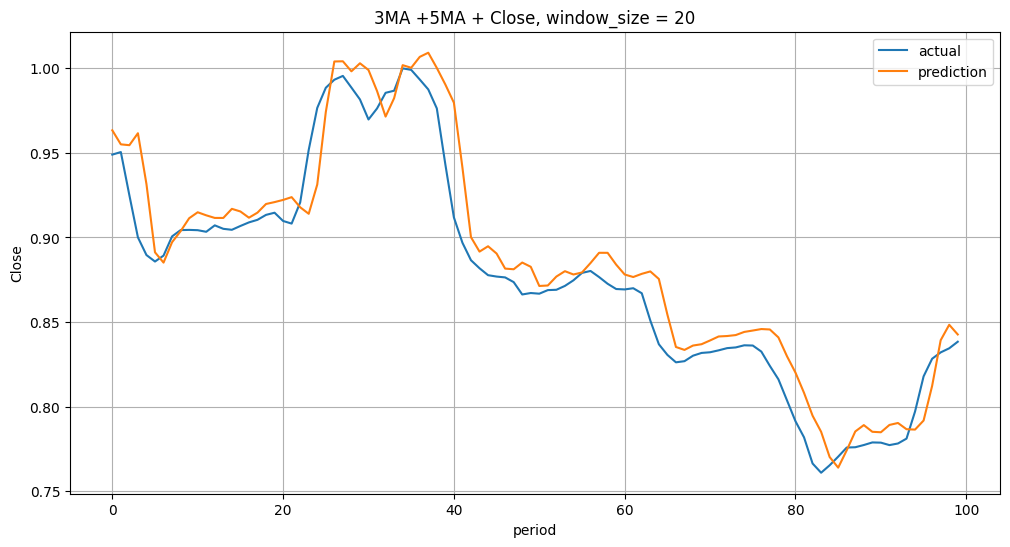

In [ ]:
pred = model.predict(x_test)

plt.figure(figsize = (12,6))
plt.title('3MA +5MA + Close, window_size = 20')
plt.ylabel('Close')
plt.xlabel('period')
plt.plot(y_test, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.grid()
plt.legend(loc = 'best')
plt.show()

In [ ]:
for i in range(6):

 df_1 = df_update.iloc[:1570 +i*2]
 label_df = pd.DataFrame(df_1, columns = label_cols)
 feature_df = pd.DataFrame(df_1, columns = feature_cols)

 label_np = label_df.to_numpy()
 feature_np = feature_df.to_numpy()

 real_list= []
 for j in range(2):

  real_list.append(feature_np[len(feature_np)-21+j:len(feature_np)-1+j])
  real_test = np.array(real_list)

 window_size = 20
 X,Y = make_sequence_dataset(feature_np, label_np, window_size)
 test = np.vstack([X, real_test])

 pred_3 = model.predict(test)
 my_array = pred_3.flatten()
 last_3 = my_array[-2:]

 if i<=4:

  df_update.loc[df_update.index[-11+2*i:-9+2*i], 'Close_EMA'] = last_3
  df_update['3MA'] = df_update['Close_EMA'].rolling(window=3, min_periods=1).mean()
  df_update['5MA'] = df_update['Close_EMA'].rolling(window=5, min_periods=1).mean()

 else:
  df_update.loc[df_update.index[-1], 'Close_EMA'] = last_3[0]
  df_update['3MA'] = df_update['Close_EMA'].rolling(window=3, min_periods=1).mean()
  df_update['5MA'] = df_update['Close_EMA'].rolling(window=5, min_periods=1).mean()

49/49 [==============================] - 1s 16ms/step


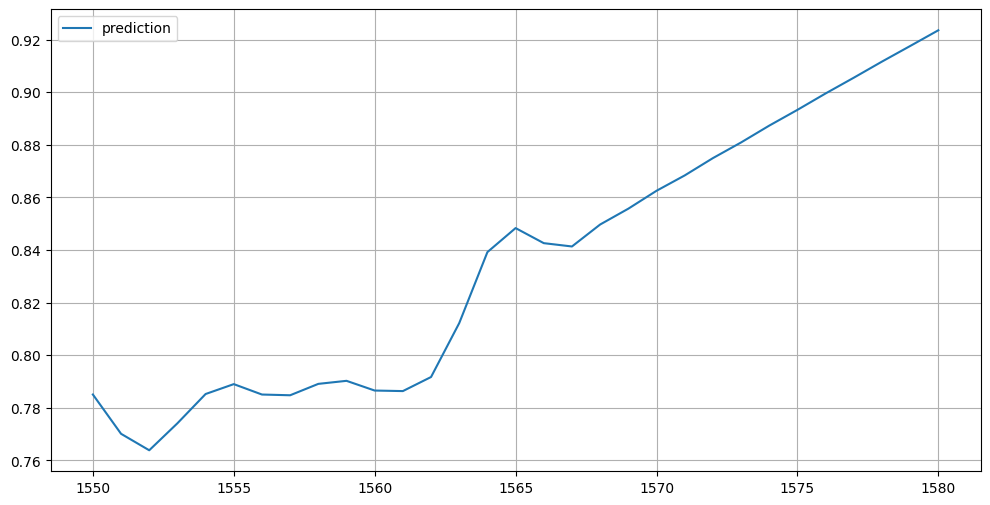

In [ ]:
df_update['new_close']= 0
df_update.loc[df_update.index[20:], 'new_close'] = my_array

df_update_graph = df_update.iloc[1550:]
plt.figure(figsize = (12,6))
plt.plot(df_update_graph['new_close'], label = 'prediction')
plt.grid()
plt.legend(loc = 'best')
plt.show()

In [ ]:
#새로 만든 추세를 merge_df에 저장
df_resampled_int = df_resampled.reset_index()
merge_df = df_resampled_int.merge(df_update, left_index = True, right_index = True)
merge_df = merge_df[['time', 'new_close']]

# Volatility 예측

In [ ]:
df = df_resampled.copy()

df['3MA'] = df['volatility_EMA'].rolling(window =3).mean()
df['5MA'] = df['volatility_EMA'].rolling(window = 5).mean()
df.reset_index(drop=True, inplace = True)
df = df[['volatility_EMA', '3MA','5MA']]

scaler = MinMaxScaler()
df_update = df.copy()
df_update
scale_cols = ['volatility_EMA']

scaled_df = scaler.fit_transform(df_update[scale_cols])
df_update[scale_cols] = scaled_df

df_update['3MA'] = df_update['volatility_EMA'].rolling(window=3, min_periods=1).mean()
df_update['5MA'] = df_update['volatility_EMA'].rolling(window=5, min_periods=1).mean()

df_update.iloc[-13:,:] =0

In [ ]:
df_update =df_update.dropna()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

window_size = 20

feature_cols = ['volatility_EMA','3MA', '5MA']
label_cols = ['volatility_EMA']

model = Sequential()

model.add(LSTM(50,
               activation='relu',
               input_shape=(window_size, len(feature_cols))))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear', kernel_regularizer=l2(0.01)))



model.summary()

# LSTM 모델 훈련 함수
def LSTM_Model(x_train, y_train, x_test, y_test):
    model.compile(loss='mse', optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['mae'])
    early_stop = EarlyStopping(monitor='val_loss', patience=5)
    model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=16, callbacks=[early_stop])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 50)                10800     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10851 (42.39 KB)
Trainable params: 10851 (42.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
df_1 = df_update.iloc[:1565]
label_df = pd.DataFrame(df_1, columns = label_cols)
feature_df = pd.DataFrame(df_1, columns = feature_cols)

label_np = label_df.to_numpy()
feature_np = feature_df.to_numpy()

real_list= []
for j in range(2):

   real_list.append(feature_np[len(feature_np)-21+j:len(feature_np)-1+j])
   real_test = np.array(real_list)

window_size = 20
X,Y = make_sequence_dataset(feature_np, label_np, window_size)
test = np.vstack([X, real_test])

split = -100

x_train = X[0:split]
y_train = Y[0:split]

x_test = X[split:]
y_test = Y[split:]

LSTM_Model(x_train, y_train, x_test, y_test)

pred_3 = model.predict(test)
my_array = pred_3.flatten()
last_20 = my_array[-2:]

df_update.loc[df_update.index[-13:-11], 'volatility_EMA'] = last_20
df_update['3MA'] = df_update['volatility_EMA'].rolling(window=3, min_periods=1).mean()
df_update['5MA'] = df_update['volatility_EMA'].rolling(window=5, min_periods=1).mean()

Epoch 1/100
91/91 [==============================] - 2s 11ms/step - loss: 0.0370 - mae: 0.0978 - val_loss: 0.0325 - val_mae: 0.1098
Epoch 2/100
91/91 [==============================] - 1s 9ms/step - loss: 0.0231 - mae: 0.0835 - val_loss: 0.0231 - val_mae: 0.1011
Epoch 3/100
91/91 [==============================] - 1s 11ms/step - loss: 0.0180 - mae: 0.0812 - val_loss: 0.0214 - val_mae: 0.1042
Epoch 4/100
91/91 [==============================] - 1s 13ms/step - loss: 0.0158 - mae: 0.0798 - val_loss: 0.0188 - val_mae: 0.1007
Epoch 5/100
91/91 [==============================] - 1s 15ms/step - loss: 0.0144 - mae: 0.0787 - val_loss: 0.0184 - val_mae: 0.1017
Epoch 6/100
91/91 [==============================] - 1s 9ms/step - loss: 0.0133 - mae: 0.0775 - val_loss: 0.0166 - val_mae: 0.0970
Epoch 7/100
91/91 [==============================] - 1s 8ms/step - loss: 0.0126 - mae: 0.0755 - val_loss: 0.0145 - val_mae: 0.0917
Epoch 8/100
91/91 [==============================] - 1s 8ms/step - loss: 0.0121

4/4 [==============================] - 0s 6ms/step


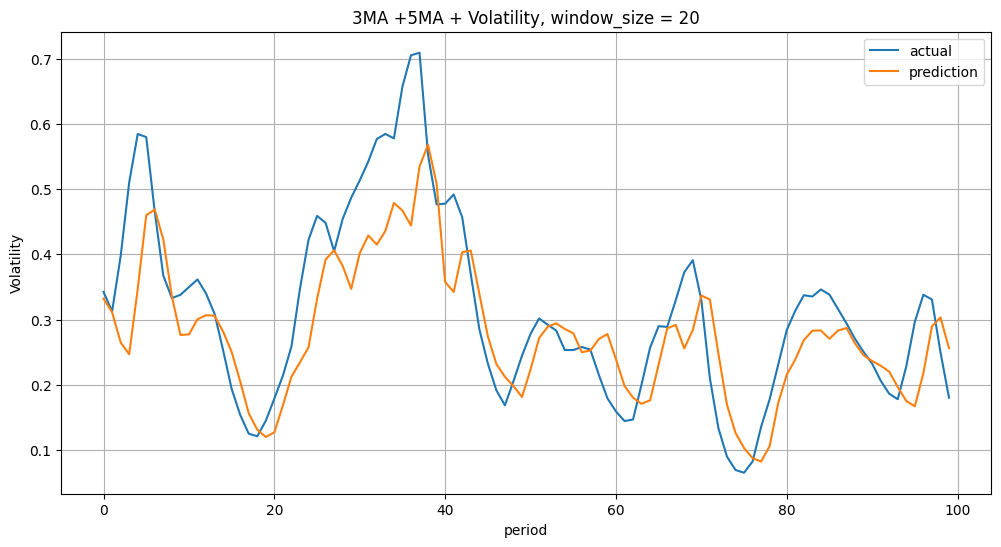

In [ ]:
pred = model.predict(x_test)

plt.figure(figsize = (12,6))
plt.title('3MA +5MA + Volatility, window_size = 20')
plt.ylabel('Volatility')
plt.xlabel('period')
plt.plot(y_test, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.grid()
plt.legend(loc = 'best')
plt.show()

In [ ]:
for i in range(6):

 df_1 = df_update.iloc[:1567 +i*2]
 label_df = pd.DataFrame(df_1, columns = label_cols)
 feature_df = pd.DataFrame(df_1, columns = feature_cols)

 label_np = label_df.to_numpy()
 feature_np = feature_df.to_numpy()

 real_list= []
 for j in range(2):

  real_list.append(feature_np[len(feature_np)-21+j:len(feature_np)-1+j])
  real_test = np.array(real_list)

 window_size = 20
 X,Y = make_sequence_dataset(feature_np, label_np, window_size)
 test = np.vstack([X, real_test])

 pred_3 = model.predict(test)
 my_array = pred_3.flatten()
 last_3 = my_array[-2:]

 if i<=4:

  df_update.loc[df_update.index[-11+2*i:-9+2*i], 'volatility_EMA'] = last_3
  df_update['3MA'] = df_update['volatility_EMA'].rolling(window=3, min_periods=1).mean()
  df_update['5MA'] = df_update['volatility_EMA'].rolling(window=5, min_periods=1).mean()

 else:
  df_update.loc[df_update.index[-1], 'volatility_EMA'] = last_3[0]
  df_update['3MA'] = df_update['volatility_EMA'].rolling(window=3, min_periods=1).mean()
  df_update['5MA'] = df_update['volatility_EMA'].rolling(window=5, min_periods=1).mean()

49/49 [==============================] - 0s 4ms/step


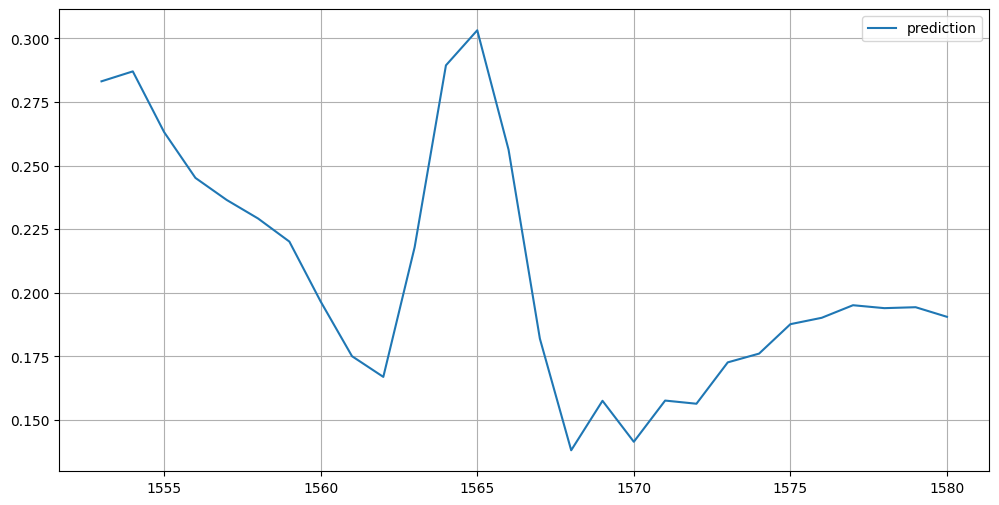

In [ ]:
df_update['new_volatility']= 0
df_update.loc[df_update.index[20:], 'new_volatility'] = my_array

df_update_graph = df_update.iloc[1550:]
plt.figure(figsize = (12,6))
plt.plot(df_update_graph['new_volatility'], label = 'prediction')
plt.grid()
plt.legend(loc = 'best')
plt.show()

In [ ]:
#새로 만든 추세를 merge_df에 저장
merge_df['new_volatility'] =0
merge_df['new_volatility'].iloc[3:] = df_update['new_volatility'].values

<ipython-input-22-30e761fb8f59>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_df['new_volatility'].iloc[3:] = df_update['new_volatility'].values


# pq 추세 예측

In [ ]:
df = df_resampled.copy()

df['3MA'] = df['pq_EMA'].rolling(window =3).mean()
df['5MA'] = df['pq_EMA'].rolling(window = 5).mean()
df.reset_index(drop=True, inplace = True)
df = df[['pq_EMA', '3MA','5MA']]

scaler = MinMaxScaler()
df_update = df.copy()
df_update
scale_cols = ['pq_EMA']

scaled_df = scaler.fit_transform(df_update[scale_cols])
df_update[scale_cols] = scaled_df

df_update['3MA'] = df_update['pq_EMA'].rolling(window=3, min_periods=1).mean()
df_update['5MA'] = df_update['pq_EMA'].rolling(window=5, min_periods=1).mean()

df_update.iloc[-13:,:] =0

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.regularizers import l2

window_size = 20

feature_cols = ['pq_EMA','3MA', '5MA']
label_cols = ['pq_EMA']

model = Sequential()

model.add(LSTM(50,
               activation='relu',
               input_shape=(window_size, len(feature_cols))))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear', kernel_regularizer=l2(0.01)))



model.summary()

# LSTM 모델 훈련 함수
def LSTM_Model(x_train, y_train, x_test, y_test):
    model.compile(loss='mse', optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['mae'])
    early_stop = EarlyStopping(monitor='val_loss', patience=5)
    model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=16, callbacks=[early_stop])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50)                10800     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10851 (42.39 KB)
Trainable params: 10851 (42.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
df_1 = df_update.iloc[:1568]
label_df = pd.DataFrame(df_1, columns = label_cols)
feature_df = pd.DataFrame(df_1, columns = feature_cols)

label_np = label_df.to_numpy()
feature_np = feature_df.to_numpy()

real_list= []
for j in range(2):

   real_list.append(feature_np[len(feature_np)-21+j:len(feature_np)-1+j])
   real_test = np.array(real_list)

window_size = 20
X,Y = make_sequence_dataset(feature_np, label_np, window_size)
test = np.vstack([X, real_test])

split = -100

x_train = X[0:split]
y_train = Y[0:split]

x_test = X[split:]
y_test = Y[split:]

LSTM_Model(x_train, y_train, x_test, y_test)

pred_3 = model.predict(test)
my_array = pred_3.flatten()
last_20 = my_array[-2:]

df_update.loc[df_update.index[-13:-11], 'pq_EMA'] = last_20
df_update['3MA'] = df_update['pq_EMA'].rolling(window=3, min_periods=1).mean()
df_update['5MA'] = df_update['pq_EMA'].rolling(window=5, min_periods=1).mean()

Epoch 1/100
91/91 [==============================] - 3s 13ms/step - loss: 0.0311 - mae: 0.0917 - val_loss: 0.0192 - val_mae: 0.0643
Epoch 2/100
91/91 [==============================] - 1s 10ms/step - loss: 0.0205 - mae: 0.0774 - val_loss: 0.0150 - val_mae: 0.0671
Epoch 3/100
91/91 [==============================] - 1s 11ms/step - loss: 0.0161 - mae: 0.0746 - val_loss: 0.0109 - val_mae: 0.0595
Epoch 4/100
91/91 [==============================] - 1s 13ms/step - loss: 0.0131 - mae: 0.0722 - val_loss: 0.0092 - val_mae: 0.0589
Epoch 5/100
91/91 [==============================] - 1s 16ms/step - loss: 0.0118 - mae: 0.0714 - val_loss: 0.0086 - val_mae: 0.0617
Epoch 6/100
91/91 [==============================] - 2s 18ms/step - loss: 0.0110 - mae: 0.0715 - val_loss: 0.0074 - val_mae: 0.0564
Epoch 7/100
91/91 [==============================] - 1s 13ms/step - loss: 0.0103 - mae: 0.0711 - val_loss: 0.0079 - val_mae: 0.0640
Epoch 8/100
91/91 [==============================] - 1s 11ms/step - loss: 0.

4/4 [==============================] - 0s 5ms/step


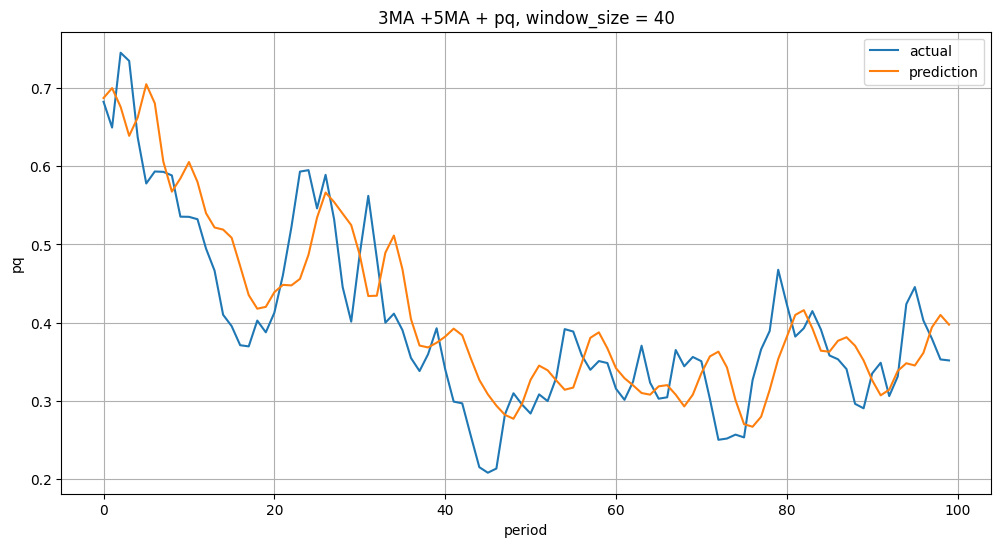

In [ ]:
pred = model.predict(x_test)

plt.figure(figsize = (12,6))
plt.title('3MA +5MA + pq, window_size = 40')
plt.ylabel('pq')
plt.xlabel('period')
plt.plot(y_test, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.grid()
plt.legend(loc = 'best')
plt.show()

In [ ]:
for i in range(6):

 df_1 = df_update.iloc[:1570 +i*2]
 label_df = pd.DataFrame(df_1, columns = label_cols)
 feature_df = pd.DataFrame(df_1, columns = feature_cols)

 label_np = label_df.to_numpy()
 feature_np = feature_df.to_numpy()

 real_list= []
 for j in range(2):

  real_list.append(feature_np[len(feature_np)-21+j:len(feature_np)-1+j])
  real_test = np.array(real_list)

 window_size = 20
 X,Y = make_sequence_dataset(feature_np, label_np, window_size)
 test = np.vstack([X, real_test])

 pred_3 = model.predict(test)
 my_array = pred_3.flatten()
 last_3 = my_array[-2:]

 if i<=4:

  df_update.loc[df_update.index[-11+2*i:-9+2*i], 'pq_EMA'] = last_3
  df_update['3MA'] = df_update['pq_EMA'].rolling(window=3, min_periods=1).mean()
  df_update['5MA'] = df_update['pq_EMA'].rolling(window=5, min_periods=1).mean()

 else:
  df_update.loc[df_update.index[-1], 'pq_EMA'] = last_3[0]
  df_update['3MA'] = df_update['pq_EMA'].rolling(window=3, min_periods=1).mean()
  df_update['5MA'] = df_update['pq_EMA'].rolling(window=5, min_periods=1).mean()

49/49 [==============================] - 0s 6ms/step


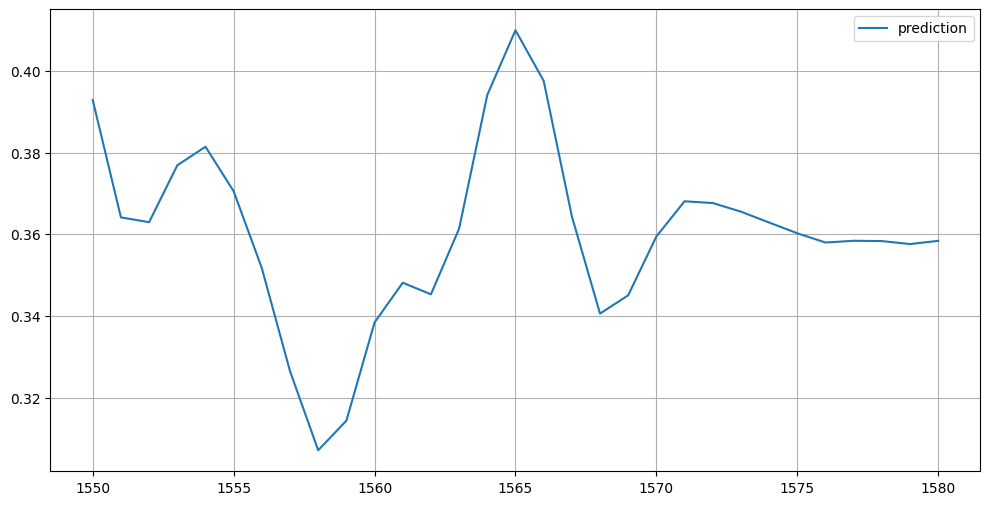

In [ ]:
df_update['new_pq']= 0
df_update.loc[df_update.index[20:], 'new_pq'] = my_array

df_update_graph = df_update.iloc[1550:]
plt.figure(figsize = (12,6))
plt.plot(df_update_graph['new_pq'], label = 'prediction')
plt.grid()
plt.legend(loc = 'best')
plt.show()

In [ ]:
#새로 만든 추세를 merge_df에 저장
merge_df['new_pq'] =0
merge_df['new_pq'] = df_update['new_pq'].values

In [ ]:
merge_df = merge_df.set_index('time')

In [ ]:
new_df = merge_df.resample('1H').asfreq()

new_df_interpolated = new_df.interpolate(method='linear')  # 선형 보간

In [ ]:
new_df_interpolated

,new_close,new_volatility,new_pq
time,,,
2023-01-01 00:00:00,0.000000,0.000000,0.000000
2023-01-01 01:00:00,0.000000,0.000000,0.000000
2023-01-01 02:00:00,0.000000,0.000000,0.000000
2023-01-01 03:00:00,0.000000,0.000000,0.000000
2023-01-01 04:00:00,0.000000,0.000000,0.000000
...,...,...,...
2024-01-30 20:00:00,0.919576,0.193111,0.357867
2024-01-30 21:00:00,0.920573,0.192482,0.357997
2024-01-30 22:00:00,0.921571,0.191853,0.358128


In [ ]:
df_extended=df_extended.set_index('time')

In [ ]:
df_retry = df_extended.merge(new_df_interpolated, left_index = True, right_index = True)

#랜덤포레스트 예측

In [ ]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer

In [ ]:
columns_to_process = ['pq_EMA', 'Open_EMA','High_EMA','Low_EMA',
        'Close_EMA', 'volume_EMA', 'volatility_EMA']

for col in columns_to_process:
    shift_values = [167,168,169, 170]
    for shift_val in shift_values:
        new_col_name = f'{col}_{shift_val}'
        df_retry[new_col_name] = df_retry[col].shift(shift_val)

In [ ]:
df_retry.drop(columns = ['Open_EMA', 'High_EMA', 'Low_EMA', 'Close_EMA',
       'volatility_EMA', 'pq_EMA', 'volume_EMA'], inplace = True)

In [ ]:
df_retry['volatility'] = df_retry['volatility'].fillna(0)
df_retry = df_retry.dropna()

In [ ]:
x_cols = [ 'new_close','new_pq',
       'new_volatility' ,'pq_EMA_167', 'pq_EMA_168', 'pq_EMA_169', 'pq_EMA_170',
       'Open_EMA_167', 'Open_EMA_168', 'Open_EMA_169', 'Open_EMA_170',
       'High_EMA_167', 'High_EMA_168', 'High_EMA_169', 'High_EMA_170',
       'Low_EMA_167', 'Low_EMA_168', 'Low_EMA_169', 'Low_EMA_170',
       'Close_EMA_167', 'Close_EMA_168', 'Close_EMA_169', 'Close_EMA_170',
       'volume_EMA_167', 'volume_EMA_168', 'volume_EMA_169', 'volume_EMA_170',
       'volatility_EMA_167', 'volatility_EMA_168', 'volatility_EMA_169',
       'volatility_EMA_170']

y_col = 'volatility'  # Fix: Use string instead of a list

In [ ]:
# Define the TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=5)  # Adjust the number of splits as needed

# Define the scoring function (MAE in this case)
scorer = make_scorer(mean_absolute_error, greater_is_better=False)

In [ ]:
df_train = df_retry[df_retry.index <= '2024-01-24']
df_valid = df_retry[(df_retry.index > '2024-01-24') & (df_retry.index < '2024-01-28')]
df_test = df_retry[df_retry.index >= '2024-01-28']

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 4, 6, 8, 10, 12, 15],
    'min_samples_leaf': [1, 2, 4, 8, 10],
    'bootstrap': [True, False]
}

# Create the Random Forest Regressor
rf_model = RandomForestRegressor()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    rf_model,
    param_distributions=param_grid,
    n_iter=10,  # Adjust the number of iterations as needed
    scoring=scorer,
    cv=tscv,
    verbose=2,
    n_jobs=-1,  # Use all available CPU cores
    random_state=42,  # Set a random seed for reproducibility


)

# Feature matrix X, Target variable y
X_train, y_train = df_train[x_cols], df_train[y_col]
tl = int(len(X_train) * 0.7)

# Fit the model with the training data
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
                   estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 5, 10, 15],
                                        'min_samples_leaf': [1, 2, 4, 8, 10],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                                              12, 15],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42,
                   scoring=make_scorer(mean_absolute_error, greater_is_better=False),
                   verbose=2)

In [ ]:
print("Best Hyperparameters:", random_search.best_params_)
best_model = random_search.best_estimator_

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_depth': None, 'bootstrap': True}


In [ ]:
# Predictions on training set
y_pred_train = best_model.predict(X_train)
mse_train = mean_squared_error(y_true=y_train, y_pred=y_pred_train)
mae_train = mean_absolute_error(y_true=y_train, y_pred=y_pred_train)
mape_train = mean_absolute_percentage_error(y_true=y_train, y_pred=y_pred_train)
r2score_train = r2_score(y_true=y_train, y_pred=y_pred_train)

In [ ]:
print("Training Performance:")
print(f'Mean Squared Error: {mse_train}')
print(f'Mean Absolute Error: {mae_train}')
print(f'Mean Absolute Percentage Error: {mape_train}')
print(f'R-squared: {r2score_train}')

Training Performance:
Mean Squared Error: 7.094865881695884e-07
Mean Absolute Error: 0.00047513018606692254
Mean Absolute Percentage Error: 0.13498691939389634
R-squared: 0.8802625566884793


In [ ]:
# Predictions on validation set
X_valid, y_valid = df_valid[x_cols], df_valid[y_col]

y_pred_valid = best_model.predict(X_valid)
mse_valid = mean_squared_error(y_true=y_valid, y_pred=y_pred_valid)
mae_valid = mean_absolute_error(y_true=y_valid, y_pred=y_pred_valid)
mape_valid = mean_absolute_percentage_error(y_true=y_valid, y_pred=y_pred_valid)
r2score_valid = r2_score(y_true=y_valid, y_pred=y_pred_valid)

In [ ]:
print("\nValidation Performance:")
print(f'Mean Squared Error: {mse_valid}')
print(f'Mean Absolute Error: {mae_valid}')
print(f'Mean Absolute Percentage Error: {mape_valid}')
print(f'R-squared: {r2score_valid}')


Validation Performance:
Mean Squared Error: 1.220631996112509e-06
Mean Absolute Error: 0.0008242770600769085
Mean Absolute Percentage Error: 0.20027769533963644
R-squared: 0.4154360649280733


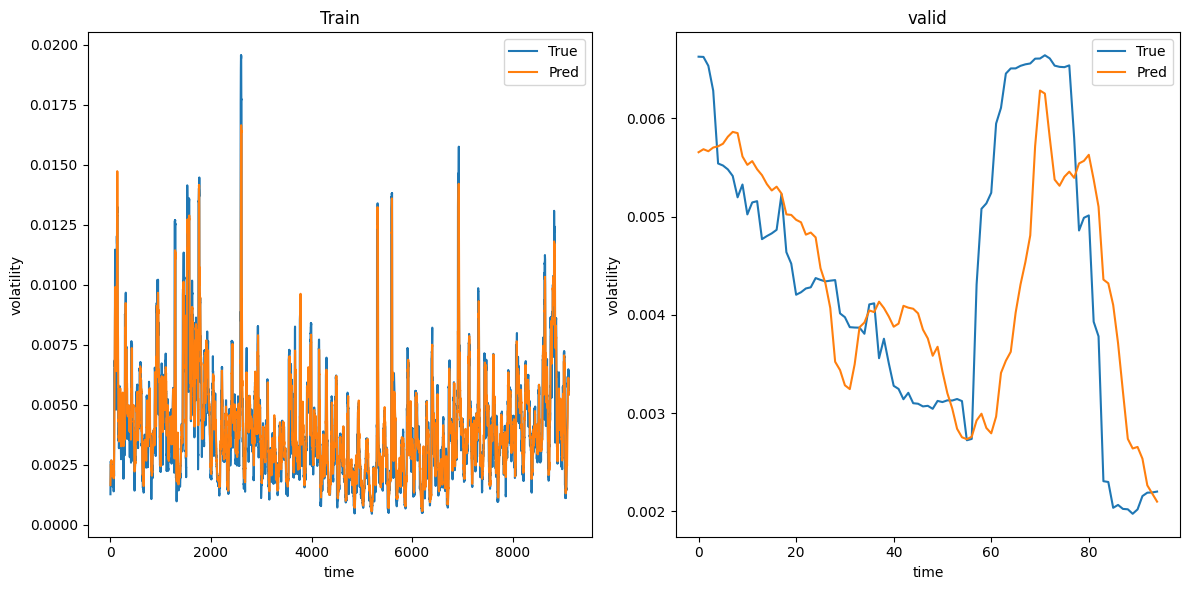

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# y_pred_train, y_pred_valid 및 tl과 같은 변수를 생성했다고 가정합니다.
# 또한 mean_squared_error, mean_absolute_error, r2_score를 가져왔는지 확인하세요.

# 훈련 및 검증 세트에 대한 시간 인덱스 생성
time_indices_train = np.arange(0,len(y_train))
time_indices_valid = np.arange(0, len(y_valid))

# 훈련 세트에 대한 플로팅
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

# 실제 값 플로팅
plt.plot(time_indices_train, y_train, label='True')

# 예측된 값 플로팅
plt.plot(time_indices_train, y_pred_train, label='Pred')

plt.title('Train')
plt.xlabel('time')
plt.ylabel('volatility')
plt.legend()

# 검증 세트에 대한 플로팅
plt.subplot(1, 2, 2)

# 실제 값 플로팅
plt.plot(time_indices_valid, y_valid, label='True')

# 예측된 값 플로팅
plt.plot(time_indices_valid, y_pred_valid, label='Pred')

plt.title('valid')
plt.xlabel('time')
plt.ylabel('volatility')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
df_test

,volatility,new_close,new_volatility,new_pq,pq_EMA_167,pq_EMA_168,pq_EMA_169,pq_EMA_170,Open_EMA_167,Open_EMA_168,...,Close_EMA_169,Close_EMA_170,volume_EMA_167,volume_EMA_168,volume_EMA_169,volume_EMA_170,volatility_EMA_167,volatility_EMA_168,volatility_EMA_169,volatility_EMA_170
time,,,,,,,,,,,,,,,,,,,,,
2024-01-28 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-01-28 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-01-28 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-01-28 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-01-28 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-30 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-01-30 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-01-30 22:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


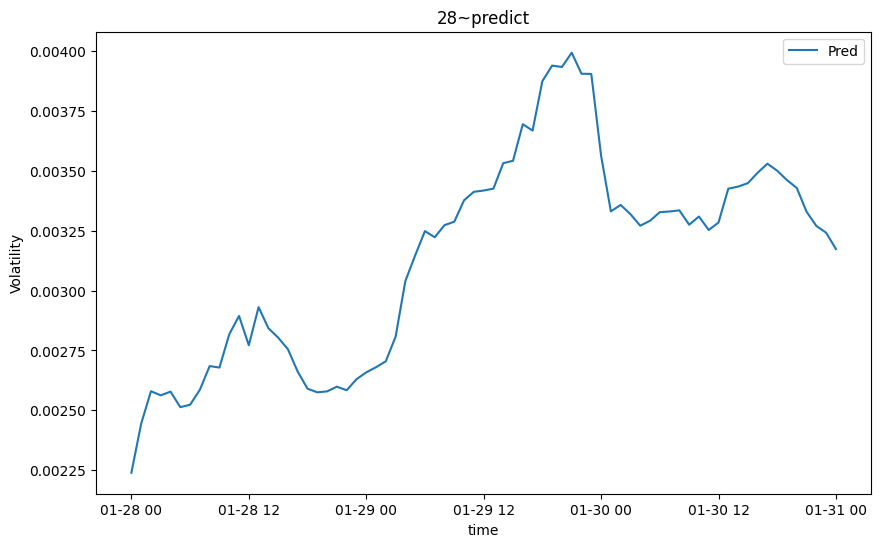

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 모델 예측값
y_pred_test = best_model.predict(df_test[x_cols])

# 시간 인덱스 설정 (예: 날짜)
time_index = df_test.index

# 라인 플롯
plt.figure(figsize=(10, 6))
plt.plot(time_index, y_pred_test, label='Pred')
plt.title('28~predict')
plt.xlabel('time')
plt.ylabel('Volatility')
plt.legend()
plt.show()

plt.show()

In [ ]:
y_pred_test

array([0.00223902, 0.00244371, 0.00257954, 0.00256225, 0.00257787,
       0.00251282, 0.00252292, 0.00258575, 0.00268448, 0.00267837,
       0.00281685, 0.00289401, 0.00277153, 0.00293088, 0.0028427 ,
       0.00280344, 0.00275467, 0.00266116, 0.00259007, 0.00257488,
       0.00257882, 0.0025985 , 0.00258352, 0.00262952, 0.00265825,
       0.00267971, 0.00270453, 0.00280704, 0.00303996, 0.00314682,
       0.0032486 , 0.00322269, 0.00327318, 0.00328763, 0.00337727,
       0.00341251, 0.00341787, 0.00342582, 0.00353213, 0.00354212,
       0.00369487, 0.00366838, 0.00387486, 0.00393979, 0.00393399,
       0.00399357, 0.00390576, 0.00390507, 0.00356409, 0.00333087,
       0.00335768, 0.00331932, 0.00327089, 0.00329157, 0.00332751,
       0.00333029, 0.00333509, 0.00327505, 0.00330931, 0.00325305,
       0.00328421, 0.00342555, 0.00343423, 0.00344875, 0.00349224,
       0.00352993, 0.00350052, 0.00346141, 0.00342871, 0.00332924,
       0.0032699 , 0.00324163, 0.00317334])

In [63]:
result = pd.DataFrame({'pred_volatility': y_pred_test})
result.to_csv('submission.csv', index=False)

In [62]:
y_pred_test.to_csv('submission.csv')

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

In [ ]:
submission = pd.read_csv()

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
submission = pd.read_csv('/content/drive/MyDrive/BCTUSDT/submission.csv')

In [57]:
submission

,Unnamed: 0,pred_volatility
0,2024-01-28 0:00,0
1,2024-01-28 1:00,0
2,2024-01-28 2:00,0
3,2024-01-28 3:00,0
4,2024-01-28 4:00,0
...,...,...
68,2024-01-30 20:00,0
69,2024-01-30 21:00,0
70,2024-01-30 22:00,0
71,2024-01-30 23:00,0
